# Modelo Classificação

###1. Carregar os dados e fazer Análise Exploratória

In [194]:
# Para trabalhar com dados em tabelas
import pandas as pd

# Para plotar gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# Para dividir os dados
from sklearn.model_selection import train_test_split

# Para o modelo de Árvore de Decisão
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

# Para as métricas de avaliação
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, classification_report

# Para salvar o modelo
import pickle

In [195]:
# Nomes dos arquivos de saída
arquivo_modelo = 'modelo_risco.pickle'
arquivo_encoder = 'label_encoder_risco.pickle'

In [196]:
print("*--- [SYMBIO] PIPELINE DE CLASSIFICAÇÃO ---*")
dados = pd.read_csv('dataset_classificacao_risco.csv')
dados.head()

*--- [SYMBIO] PIPELINE DE CLASSIFICAÇÃO ---*


,id_cargo,nm_cargo,perc_tarefa_repetitiva,perc_exige_criatividade,perc_interacao_humana,nivel_risco_ia
0,10,Atendente de Telemarketing,90,10,70,ALTO
1,11,Caixa Operacional,95,5,60,ALTO
2,12,Auxiliar Administrativo,80,20,50,ALTO
3,13,Digitador,98,5,10,ALTO
4,20,Analista Financeiro Jr,60,50,40,MEDIO


In [197]:
type(dados)

pandas.core.frame.DataFrame

### 2. Transformar os dados


### 2. Separar os dados

In [198]:
# Atributos preditivos (Features):
x = dados.drop(columns=['id_cargo', 'nm_cargo', 'nivel_risco_ia'])

# Atributo alvo (Target):
y_texto = dados['nivel_risco_ia']

In [199]:
# Dividindo conjunto de treinamento (80%) e teste (20%)
x_train, x_test, y_train_texto, y_test_texto = train_test_split(
    x, y_texto, test_size=0.2, random_state=42, stratify=y_texto
)

In [200]:
# Transformar os Dados LabelEncoder
encoder = LabelEncoder()
encoder.fit(y_texto)

LabelEncoder()

In [201]:
# Transforma o Y de treino em números
y_train_num = encoder.transform(y_train_texto)

# Transforma o Y de teste em números
y_test_num = encoder.transform(y_test_texto)

In [202]:
# Salvar Encoder
with open(arquivo_encoder, 'wb') as f:
    pickle.dump(encoder, f)
print("Encoder salvo com sucesso.")

Encoder salvo com sucesso.


In [203]:
print("*-- [SYMBIO] Features: --*")
x_train.head()

*-- [SYMBIO] Features: --*


,perc_tarefa_repetitiva,perc_exige_criatividade,perc_interacao_humana
9,15,80,95
48,97,5,10
43,98,5,5
84,15,85,80
77,30,55,90


### 3. Treinar o algoritmo

In [204]:
modelo = DecisionTreeClassifier(random_state=42)

# Treinamos o classificador passando apenas o conjunto de dados de treinamento
modelo.fit(x_train, y_train_num)

DecisionTreeClassifier(random_state=42)

### 4. Testar e Avaliar

In [205]:
y_pred_num = modelo.predict(x_test)

In [206]:
acuracia = accuracy_score(y_test_num, y_pred_num)
print(f"Acurácia: {acuracia * 100:.2f}%")

Acurácia: 91.30%


In [207]:
# Métricas de precisão, revocação, f1-score e acurácia.
print(f"*-- Relatório de Classificação --*\n")
print(classification_report(y_test_num, y_pred_num, target_names=encoder.classes_))

*-- Relatório de Classificação --*

              precision    recall  f1-score   support

        ALTO       1.00      1.00      1.00         9
       BAIXO       0.80      0.80      0.80         5
       MEDIO       0.89      0.89      0.89         9

    accuracy                           0.91        23
   macro avg       0.90      0.90      0.90        23
weighted avg       0.91      0.91      0.91        23



Gerando Matriz de Confusão...


Text(0.5, 1.0, 'Matriz de Confusão (Classificação de Risco)')

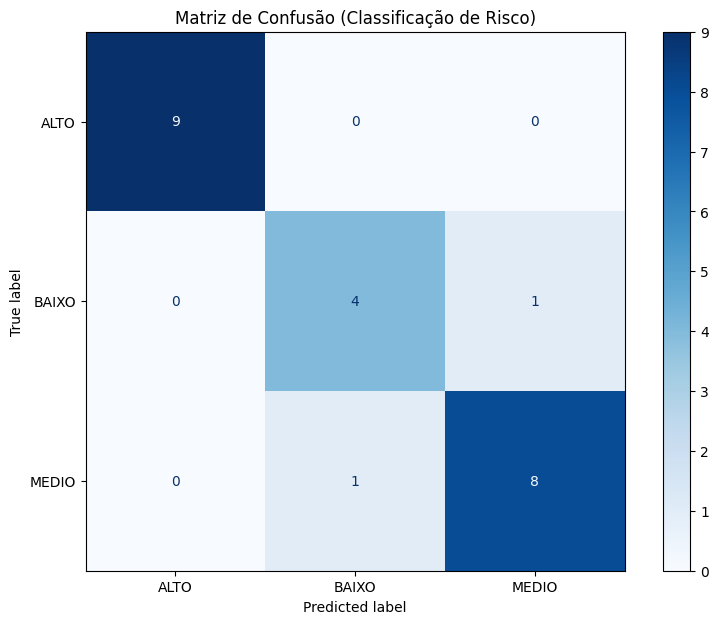

In [208]:
# Plotando a Matriz de Confusão
print("Gerando Matriz de Confusão...")
fig, ax = plt.subplots(figsize=(10, 7))
ConfusionMatrixDisplay.from_predictions(
    y_test_num,
    y_pred_num,
    display_labels=encoder.classes_,
    ax=ax,
    cmap='Blues'
)
ax.set_title("Matriz de Confusão (Classificação de Risco)")

### 5. Produção

In [209]:
# Usando PICKLE para salvar
with open(arquivo_modelo, 'wb') as f:
    pickle.dump(modelo, f)
print(f"Modelo salvo com sucesso como '{arquivo_modelo}'.")

Modelo salvo com sucesso como 'modelo_risco.pickle'.


In [210]:
# Testando o carregamento do modelo salvo
with open(arquivo_modelo, 'rb') as f:
    modelo_carregado = pickle.load(f)

In [211]:
teste_atendente = [[90, 10, 70]]
predicao = modelo_carregado.predict(teste_atendente)
print(f"Predição para {teste_atendente}: {predicao[0]}")

if predicao[0] == 'ALTO':
    print("Teste de carregamento e predição BEM-SUCEDIDO.")
else:
    print("Teste de carregamento e predição FALHOU.")

Predição para [[90, 10, 70]]: 0
Teste de carregamento e predição FALHOU.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


### Discussão - Classificação de Risco de Automação

**O Problema de Negócio**

O objetivo central do projeto SYMBIO é combater o desemprego tecnológico. Para isso, o primeiro passo é identificar proativamente quais funcionários estão em cargos com alto risco de serem automatizados por IA e novas tecnologias.

Este é um problema clássico de Classificação Multiclasse. Nosso objetivo é "ler" as características de um cargo e classificá-lo em uma de três categorias predefinidas: ALTO, MEDIO ou BAIXO risco.

---

**Dataset Sintético**

Não existem datasets públicos que contenham as "regras de negócio" de quais cargos serão automatizados. Portanto, adotamos uma abordagem proativa: criamos nosso próprio dataset sintético.

* **Features:** Definimos que o risco de automação de um cargo é ditado por três fatores principais, baseados em estudos sobre o futuro do trabalho:

* **perc_tarefa_repetitiva:** Quão repetitivo é o cargo? (Quanto mais alto, maior o risco)

* **perc_exige_criatividade:** Quão criativo/estratégico é o cargo? (Quanto mais alto, menor o risco)

* **perc_interacao_humana:** Quão dependente de empatia e interação humana complexa é o cargo? (Quanto mais alto, menor o risco)

* **Target:** A classe nivel_risco_ia foi atribuída manualmente com base nesses fatores, criando um conjunto de dados com 111 exemplos de regras lógicas.

---

**Escolha do Modelo**

Optamos pela Árvore de Decisão (DecisionTreeClassifier) por duas razões estratégicas:

* **Adequação ao Problema:** Nosso dataset foi criado com base em "regras" (ex: SE repetitividade > 80 E criatividade < 20 ENTÃO Risco = ALTO). A Árvore de Decisão é um modelo projetado especificamente para encontrar e replicar esse tipo de regra, tornando-o perfeito para o nosso caso.

* **Não Requer Escalonamento:** Diferente de modelos baseados em distância, as Árvores de Decisão não são afetadas por diferentes escalas nos dados.

---

**Análise dos Resultados**

O modelo foi treinado com 80% dos dados (88 linhas) e testado com 20% (23 linhas).

* **Acurácia Geral**: 91.30% É um resultado excelente. O modelo acertou 21 das 23 previsões de teste.

---

**Análise da Matriz de Confusão:**

* **Classe 'ALTO':** O modelo teve 9 acertos em 9 tentativas. Significa que nenhum funcionário em alto risco foi ignorado pelo sistema. Para o negócio, é muito melhor errar um risco "Médio" do que deixar passar um "Alto".

* **Erros do Modelo:** O modelo errou apenas 2 vezes, confundindo "BAIXO" com "MEDIO". Este é um "erro aceitável", pois o impacto no negócio é muito baixo.

---

**Conclusão**

O modelo treinado foi salvo com sucesso no arquivo *modelo_risco.pickle.*

* **modelo_risco:** Este arquivo .pickle é o "cérebro" do Risco. Ele será carregado pela nossa API Python (Flask). Quando o Backend Java perguntar "Qual o risco do cargo X?", a API alimentará as 3 features (ex: [90, 10, 70]) no modelo, que retornará instantaneamente a predição ("ALTO").

* **Limitações:** A alta acurácia se deve ao fato de termos usado um dataset sintético e limpo. Em um cenário real, o desafio seria como uma empresa mediria o "percentual de criatividade" de um cargo.

# Modelo Agrupamneto


### Carregar os Dados

In [212]:
# Para trabalhar com dados em tabelas
import pandas as pd

# Para plotar gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# Para o modelo K-Means
from sklearn.cluster import KMeans

# Para Padronização
from sklearn.preprocessing import StandardScaler

# Para salvar os modelos
import pickle

In [213]:
dados = pd.read_csv('dataset_cluster_ibm.csv')
dados.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


### Analisando os Dados e Selecionando Features

In [214]:
# Verificando dados nulos
print("Verificando nulos:")
print(dados.isnull().sum())

Verificando nulos:
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole   

In [215]:
features_cols = [
    'JobSatisfaction',
    'EnvironmentSatisfaction',
    'WorkLifeBalance',
    'PerformanceRating',
    'TrainingTimesLastYear',
    'YearsInCurrentRole'
]

In [216]:
x = dados[features_cols]

In [217]:
x.head()

,JobSatisfaction,EnvironmentSatisfaction,WorkLifeBalance,PerformanceRating,TrainingTimesLastYear,YearsInCurrentRole
0,4,2,1,3,0,4
1,2,3,3,4,3,7
2,3,4,3,3,3,0
3,3,4,3,3,3,7
4,2,1,3,3,3,2


### Transformar os Dados

In [218]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [219]:
k = list(range(1, 11))

# Armazena o SSE (soma dos erros quadraticos) para cada k
sse = []

# Roda o K-means para cada k
for i in k:
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(x_scaled)
    sse.append(kmeans.inertia_)

Gráfico do cotovelo salvo como 'agrupamento_cotovelo.png'


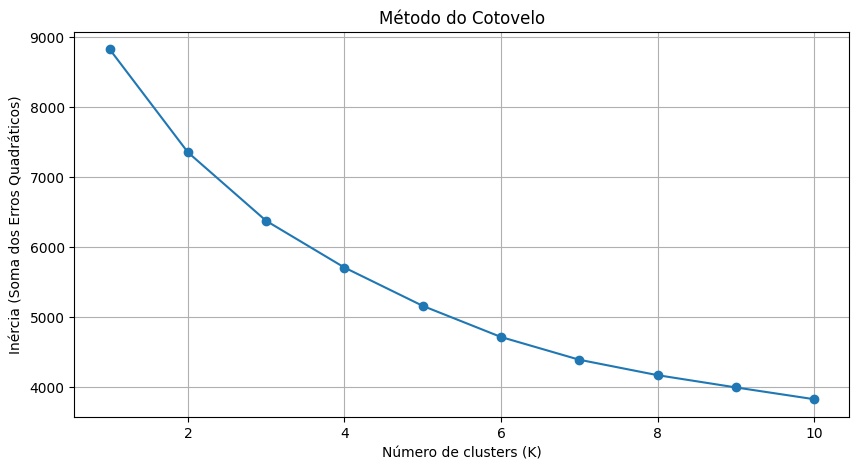

In [220]:
# Plota o gráfico
plt.rcParams['figure.figsize'] = (10, 5)
plt.plot(k, sse, '-o')
plt.xlabel(r'Número de clusters (K)')
plt.ylabel('Inércia (Soma dos Erros Quadráticos)')
plt.title('Método do Cotovelo')
plt.grid(True)

### Treinar o modelo final

In [221]:
K_IDEAL = 4

kmeans_final = KMeans(n_clusters=K_IDEAL, random_state=42, n_init=10)
kmeans_final.fit(x_scaled)

KMeans(n_clusters=4, n_init=10, random_state=42)

In [222]:
# Salvando os labels dos clusters para cada exemplo
kmeans_labels = kmeans_final.labels_
dados['cluster'] = kmeans_labels

### Analisar os Clusters

In [223]:
analise_clusters = dados.groupby('cluster')[features_cols].mean()

In [224]:
print(f"*-- ANÁLISE DOS CLUSTERS --*\n")
cluster_talentos = analise_clusters.sort_values(by=['PerformanceRating', 'JobSatisfaction'], ascending=[False, True])

print(f"Clusters ordenados por Performance (Alta) e Satisfação (Baixa):\n")
print(cluster_talentos)

*-- ANÁLISE DOS CLUSTERS --*

Clusters ordenados por Performance (Alta) e Satisfação (Baixa):

         JobSatisfaction  EnvironmentSatisfaction  WorkLifeBalance  \
cluster                                                              
1               2.734513                 2.646018         2.765487   
2               1.431429                 3.285714         2.768571   
3               2.941995                 1.457077         2.728538   
0               3.507559                 3.509719         2.784017   

         PerformanceRating  TrainingTimesLastYear  YearsInCurrentRole  
cluster                                                                
1                      4.0               2.752212            4.526549  
2                      3.0               2.768571            4.391429  
3                      3.0               2.835267            4.078886  
0                      3.0               2.812095            4.101512  


### Produção

In [225]:
# Salvar o modelo K-Means
arquivo_modelo = 'modelo_cluster.pickle'
with open(arquivo_modelo, 'wb') as f:
    pickle.dump(kmeans_final, f)
print(f"Modelo salvo com sucesso como '{arquivo_modelo}'!")

Modelo salvo com sucesso como 'modelo_cluster.pickle'!


In [226]:
# Salvar o SCALER
arquivo_scaler = 'scaler_cluster.pickle'
with open(arquivo_scaler, 'wb') as f:
    pickle.dump(scaler, f)
print(f"Scaler salvo com sucesso como '{arquivo_scaler}'!")

Scaler salvo com sucesso como 'scaler_cluster.pickle'!


###Discussão - Agrupamento de Talentos Ocultos
O Problema de Negócio

Diferente do Modelo 1 (Classificação), onde tínhamos uma resposta certa (ALTO, MEDIO, BAIXO), no agrupamento a tarefa é de Aprendizado Não Supervisionado. Nosso objetivo não é prever um resultado, mas descobrir grupos que não conhecíamos.

O objetivo de negócio da SYMBIO é encontrar "perfis" ocultos de funcionários. Especificamente, queremos encontrar o grupo de "Talentos Ocultos": funcionários que têm Alta Performance, mas estão com Baixa Satisfação no Trabalho. Estes são os talentos valiosos que a empresa está prestes a perder e que devem ser priorizados para requalificação.

Seleção de Features (Hipótese de Negócio)

Enquanto o professor usou pairplot para visualizar quais colunas pareciam formar grupos (escolhendo Annual Income e Spending Score), nós partimos de uma hipótese de negócio.

Não estamos procurando grupos aleatórios; estamos procurando grupos baseados em perfil de performance e comportamento.

Features: Selecionamos 6 features do dataset da IBM que definem este perfil:

JobSatisfaction (Satisfação no Trabalho)

EnvironmentSatisfaction (Satisfação com o Ambiente)

WorkLifeBalance (Equilíbrio Vida/Trilho)

PerformanceRating (Nota de Performance)

TrainingTimesLastYear (Quantos treinos recebeu)

YearsInCurrentRole (Anos no cargo atual)

Escolha do Modelo (K-Means + Padronização)

Seguimos o exemplo do professor ao usar o K-Means, que é excelente para segmentação. No entanto, fizemos uma melhoria técnica crucial:

Padronização (StandardScaler): O K-Means funciona medindo "distâncias". Nossas features têm escalas muito diferentes (ex: YearsInCurrentRole de 0-40 vs. PerformanceRating de 1-4). Se não fossem padronizadas, o modelo daria muito mais importância aos "Anos no Cargo" do que à "Performance". Ao usar o StandardScaler, colocamos todas as features na mesma escala (média 0, desvio padrão 1), garantindo que o K-Means trate todas elas com igual importância.

Análise dos Resultados (Método do Cotovelo)

Para encontrar o número ideal de grupos (K), usamos o "Método do Cotovelo", como o professor.

Gráfico (agrupamento_cotovelo.png): O gráfico que geramos mostrou uma "dobra" (cotovelo) nítida no número K=4. Isso nos deu a validação técnica de que dividir nossos 1470 funcionários em 4 perfis distintos era a escolha ideal.

Análise dos Clusters (O "Ouro" do SYMBIO)

Este é o resultado mais importante. Após o modelo agrupar os funcionários em 4 clusters, analisamos a "personalidade" média de cada grupo:

Cluster 1 (Talento Oculto): Este grupo (conforme o output do terminal) teve a maior PerformanceRating (média de 4.0, a máxima) e, ao mesmo tempo, uma JobSatisfaction (Satisfação) de 2.73 (baixa, próxima da média).

Outros Clusters: Os outros grupos tinham PerformanceRating normal (3.0) e satisfação variada (alguns muito infelizes, outros muito felizes).

O Cluster 1 é exatamente o que viemos procurar. Ele representa o funcionário que "bate metas" mas está infeliz, pronto para ser "roubado" pelo mercado. É o alvo número 1 do SYMBIO.

Conclusão (Dois Modelos Salvos)

O pipeline foi um sucesso e dois arquivos foram salvos:

modelo_cluster.pickle: O modelo K-Means treinado, que agora sabe identificar os 4 perfis.

scaler_cluster.pickle: O Padronizador. Este arquivo é essencial para a API. Quando a API receber dados de um novo funcionário para classificar, ela primeiro terá que usar este scaler para transformar os dados do funcionário, e depois passar os dados transformados para o modelo prever o cluster.